In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\user\.conda\envs\panadas-tutorial\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
dataset = pd.read_csv("Iris (2).csv",)

In [5]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset.rename(columns ={'SepalLengthCm':'Sepal.Length'}, inplace=True)
dataset.rename(columns ={'SepalWidthCm':'Sepal.Width'}, inplace=True)
dataset.rename(columns ={'PetalLengthCm':'Petal.Length'}, inplace=True)
dataset.rename(columns ={'PetalWidthCm':'Petal.Width'}, inplace=True)

In [7]:
dataset.head()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

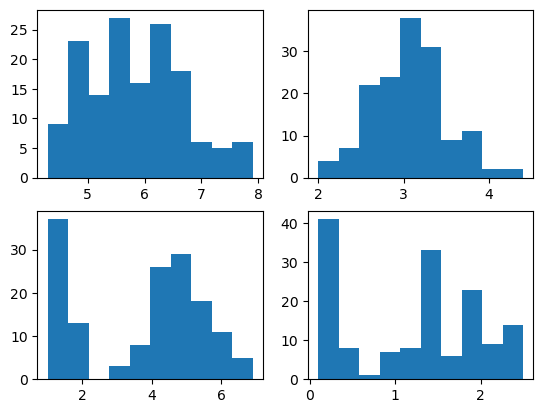

In [10]:
plt.subplot(2,2,1)
plt.hist(dataset['Sepal.Length'])
plt.subplot(2,2,2)
plt.hist(dataset['Sepal.Width'])
plt.subplot(2,2,3)
plt.hist(dataset['Petal.Length'])
plt.subplot(2,2,4)
plt.hist(dataset['Petal.Width'])
plt.show

In [11]:
colors=['red','yellow','green']
species=['setosa', 'versicolor', 'virginica']

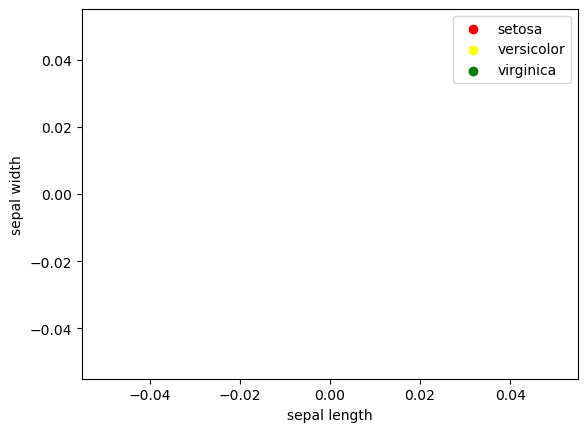

In [14]:
for i in range(3):
    x=dataset[dataset['Species']==species[i]]
    plt.scatter(x['Sepal.Length'],x['Sepal.Width'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [15]:
# Split the dataset into features and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Scale the features using standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Train a logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [20]:
# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


In [21]:
import pickle
pickle.dump(classifier, open('IrisFlower.pkl', 'wb'))